In [3]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

## 1. build dataset

### normal dataset

In [2]:
import dataset

In [ ]:
df_dataset = dataset.build_normal_dataframe(numpy_output_file='fulldata.npy', dataframe_output_file='df_cohort')

### autoencoded dataset

In [ ]:
import dataset
# params.encoder_training_epochs = 10   # uncomment if you want a short demo training
np_dataset = dataset.build_autoencoded_data_matrix(numpy_output_file='autoencoded_fulldata.npy')

## 2. Random Forest model: train and evaluate

In [4]:
from baseline_model import RandomForest

In [13]:
from dataproc import io
df_dataset = io.load_dataframe('df_cohort')

Training Set:  Counter({0: 3559, 1: 2192})
Oversampling:  Counter({0: 3559, 1: 3559})


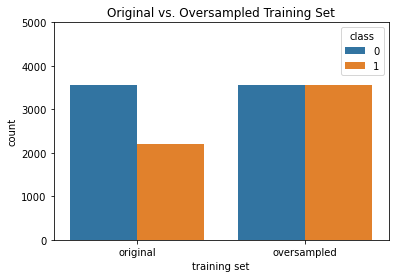

CV F1-score: 0.709 +/- 0.010
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       396
           1       0.64      0.68      0.66       244

    accuracy                           0.73       640
   macro avg       0.72      0.72      0.72       640
weighted avg       0.74      0.73      0.73       640


TN: 301 FP: 95 FN: 77 TP: 167

No Skill: ROC AUC=0.500
Rand Forest: ROC AUC=0.789


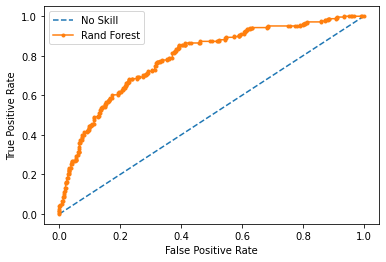

Rand Forest: f1=0.660 auc=0.690


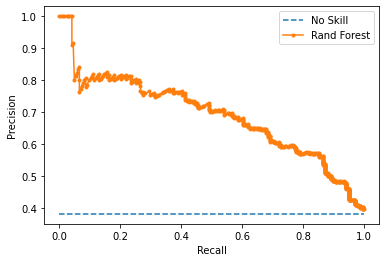

In [15]:
RandomForest(df_dataset)

## 3. MLP: train and evaluate

### 1. normal dataset

In [ ]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[676, 338], batch_size = 128, upper_y_lim = 1, p = 0.5)

### autoencoded dataset

In [ ]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/autoencoded_fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=10, nodes=[128, 64], # [676, 338],
                      batch_size = 128, upper_y_lim = 1, p = 0.2)